In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot

import tensorflow as tf
from keras.layers import (LeakyReLU, 
                         BatchNormalization,
                         LeakyReLU,
                         Conv2DTranspose,
                         Conv2D,
                         Dropout,
                         Concatenate,
                         Activation,
                         Input
                         )
from keras.initializers import RandomNormal
from keras.models import Sequential,Model
from keras.optimizers import Adam

In [133]:
rad_path="D:/Data/Datasets/cyprus/radpat_1/"
cod_path="D:/Data/Datasets/cyprus/codmat_1/"
data_file="D:/Data/Datasets/cyprus/excel.npz"
skip_rows=5
skip_cols=5
threshold=0.01
mi=1000
ma=1100

rad_data=[]
cod_data=[]
data = np.load(data_file)
rad_data,cod_data=data['arr_0'],data['arr_1']
rad_data=rad_data.tolist()
cod_data=cod_data.tolist()
if mi==0:
    rad_data=[]
    cod_data=[]
else:
    rad_data=rad_data[0:mi]
    cod_data=cod_data[0:mi]
print(len(rad_data))

100


In [134]:
def sixer(ans):
    for i in range(0,6):
        temp=[]
        for j in range(0,36):
            temp.append([0,255,0])
        ans.append(temp)
    return ans
def three(temp):
    for j in range(0,6):
        temp.append([0,255,0])
    return temp
def padder(arr):
    ans=[]
    ans=sixer(ans)
    for i in arr:
        temp=[]
        temp=three(temp)
        for j in i:
            if j==0:
                temp.append([0,255,0])
            else:
                temp.append([255,0,0])
        temp=three(temp)
        ans.append(temp)
    ans=sixer(ans)
    return ans

n=0
for f in os.listdir(cod_path):
    if n>=ma:
        break
    m=0
    df1 = np.asarray(pd.read_excel(cod_path+f,header=None))
    for i in range(0,len(df1)):
        for j in range(0,len(df1[i])):
            if df1[i][j]!=0:
                df1[i][j]=1
                m=m+1
    if m>200 and m<800:
        n=n+1
        if n>mi:
            cod_data.append(padder(df1))
            df1 = np.asarray(pd.read_excel(rad_path+f,header=None))
            df1=df1/np.max(df1)
            arr=[]
            for i in range(1,len(df1),skip_rows):
                arrtemp=[]
                for j in range(0,len(df1[i]),skip_cols):
                    if df1[i][j]<threshold:
                        arrtemp.append([0,255,0])#ZERO
                    else:
                        arrtemp.append([255,0,0])#ONE
                arr.append(arrtemp)
            rad_data.append(arr)
    print(f,n)
print(len(cod_data))

0x0.xlsx 0
0x1.xlsx 0
0x10.xlsx 0
0x100.xlsx 0
0x101.xlsx 0
0x102.xlsx 0
0x103.xlsx 0
0x104.xlsx 0
0x105.xlsx 0
0x106.xlsx 0
0x107.xlsx 0
0x108.xlsx 0
0x109.xlsx 0
0x11.xlsx 0
0x110.xlsx 0
0x111.xlsx 0
0x112.xlsx 0
0x113.xlsx 0
0x114.xlsx 0
0x115.xlsx 0
0x116.xlsx 0
0x117.xlsx 0
0x118.xlsx 0
0x119.xlsx 0
0x12.xlsx 0
0x120.xlsx 0
0x121.xlsx 0
0x122.xlsx 0
0x123.xlsx 0
0x124.xlsx 0
0x125.xlsx 0
0x126.xlsx 0
0x127.xlsx 0
0x128.xlsx 0
0x129.xlsx 0
0x13.xlsx 0
0x130.xlsx 0
0x131.xlsx 0
0x132.xlsx 0
0x133.xlsx 0
0x134.xlsx 0
0x135.xlsx 0
0x136.xlsx 0
0x137.xlsx 0
0x138.xlsx 0
0x139.xlsx 0
0x14.xlsx 0
0x140.xlsx 0
0x141.xlsx 0
0x142.xlsx 0
0x143.xlsx 0
0x144.xlsx 0
0x145.xlsx 0
0x146.xlsx 0
0x147.xlsx 0
0x148.xlsx 0
0x149.xlsx 0
0x15.xlsx 0
0x150.xlsx 0
0x151.xlsx 0
0x152.xlsx 0
0x153.xlsx 0
0x154.xlsx 0
0x155.xlsx 0
0x156.xlsx 0
0x157.xlsx 0
0x158.xlsx 0
0x159.xlsx 0
0x16.xlsx 0
0x160.xlsx 0
0x161.xlsx 0
0x162.xlsx 0
0x163.xlsx 0
0x164.xlsx 0
0x165.xlsx 0
0x166.xlsx 0
0x167.xlsx 0
0x168.xlsx

In [135]:
rad_data=np.array(rad_data)
cod_data=np.array(cod_data)
np.savez_compressed((data_file),rad_data,cod_data)

Loaded (1000, 36, 36, 3) (1000, 36, 36, 3)


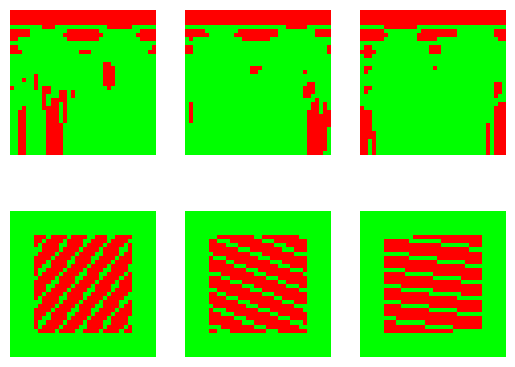

In [137]:
n=3
disp = [np.random.randint(ma) for i in range(n)]
data = np.load(data_file)
rad_data,cod_data=data['arr_0'],data['arr_1']
print('Loaded', rad_data.shape, cod_data.shape)
for i in range(n):
	pyplot.subplot(2, n, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(rad_data[disp[i]].astype('uint8'))
for i in range(n):
	pyplot.subplot(2, n, 1 + n + i)
	pyplot.axis('off')
	pyplot.imshow(cod_data[disp[i]].astype('uint8'))
pyplot.show()

In [138]:
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (3,3), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (3,3), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model
 
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g
 
# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g
 
# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (3,3), strides=(1,1), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model
 
# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = np.load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]
 
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = np.random.randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = np.ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y
 
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = np.zeros((len(X), patch_shape, patch_shape, 1))
	return X, y
 
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realB[i])
	# save plot to file
	filename1 = 'plot_%06d.png' % (step+1)
	pyplot.savefig(filename1)
	pyplot.close()
 
# train pix2pix models
def train(d_model, g_model, gan_model, dataset, n_epochs, n_batch=1):
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		# summarize model performance
		if (i+1) % (bat_per_epo) == 0:
			summarize_performance(i, g_model, dataset)
	msave = 'D:/Data/Datasets/cyprus/gan.h5'
	g_model.compile()
	g_model.save(msave)
	print("Saved and Completed")

In [139]:
n_batch=1
n_epochs=5
dataset = load_real_samples(data_file)
print('Loaded', dataset[0].shape, dataset[1].shape)
trainA, trainB = dataset
bat_per_epo = int(len(trainA) / n_batch)
# calculate the number of training iterations
n_steps = bat_per_epo * n_epochs
print(n_steps)

Loaded (1000, 36, 36, 3) (1000, 36, 36, 3)
5000


In [140]:
image_shape = dataset[0].shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
with tf.device('/gpu:0'):
    train(d_model, g_model, gan_model, dataset,n_epochs,n_batch)

: 

: 

In [129]:
# load and prepare training images
def load_real_samples(filename):
	# load compressed ararys
	data = np.load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

In [131]:
[X1, X2] = load_real_samples(data_file)
print('Loaded', X1.shape, X2.shape)
model = tf.keras.models.load_model('D:/Data/Datasets/cyprus/gan.h5')

Loaded (100, 36, 36, 3) (100, 36, 36, 3)


[40]
1/1 [==============================] - 1s 561ms/step


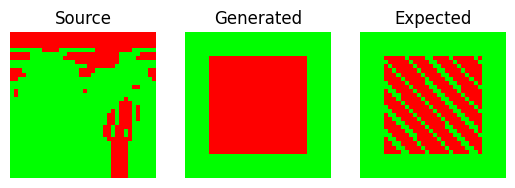

In [132]:
def plot_images(src_img, gen_img, tar_img):
	images = np.vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, 3, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# show title
		pyplot.title(titles[i])
	pyplot.show()
ix = np.random.randint(0, len(X1), 1)
print(ix)
src_image, tar_image = X1[ix], X2[ix]
gen_image = model.predict(src_image)
plot_images(src_image, gen_image, tar_image)